In [1]:
import pandas as pd
import numpy as np
DEFAULT_DATA_DIR = "../data/globalterrorismdb_0616dist.txt"

# load data
data = pd.read_csv(DEFAULT_DATA_DIR, sep="\t", na_values=['.', 'nan'], low_memory=False)


In [2]:
### EXPLORTARY ANALYSIS ###
#print(len(data))
#print(len(data.columns))
#for col in data.columns:
#    print("{0}, type={3}, {1}% null, {2} uniqe val".format(col, float(np.sum(pd.isnull(data[col])))/len(data)*100, len(np.unique(data[col]))
#, data[col].dtype))

print(len(data))
print(len(data.columns))
print(len(np.unique(data['gname'])))
has_null = 0
more_than_50_null = 0
text_col = 0
more_than_30_null_or_text = 0
for col in data.columns:
    if float(np.sum(pd.isnull(data[col])))/len(data) > 0:
        has_null += 1
        if float(np.sum(pd.isnull(data[col])))/len(data) > 0.5:
            more_than_50_null += 1
    if str(data[col].dtype) == "object":
        text_col +=1
    if float(np.sum(pd.isnull(data[col])))/len(data) > 0.3 or str(data[col].dtype) == "object":
        more_than_30_null_or_text += 1
print has_null
print more_than_50_null
print text_col
print more_than_30_null_or_text


156772
137
3290
106
79
58
103


In [3]:
np.unique(data['approxdate'])

/usr/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


array([nan, '01/04/2000', '01/17/2006', ..., 'September 8-14, 2013',
       'Within the first 10 days of the month', 'Yes'], dtype=object)

Initial Explortary Analysis Summary:

156772 ROWS

137 COLUMNS

Original Columns:

- Time
 - iyear, type=int64, 0.0% null, 45 uniqe val
 - imonth, type=int64, 0.0% null, 13 uniqe val
 - iday, type=int64, 0.0% null, 32 uniqe val
 - approxdate, type=object, 96.9662950017% null, 1427 uniqe val
 - extended, type=int64, 0.0% null, 2 uniqe val
 - resolution, type=object, 97.7661827367% null, 2658 uniqe val

Notes:
  - Some of of the $imonth$ and $iday$ are 0, which means that the exact date is unknown. Estimates are given in $approxdate$, but the format in $approxdate$ varies.

  - Need to extract the week day out of the date feature.

  - $resolution$ is not meaningful as most of them is null. $approxdate$ can be dropped once it's used to impute date.




- Location
 - country, type=int64, 0.0% null, 206 uniqe val
 - country_txt, type=object, 0.0% null, 206 uniqe val
 - region, type=int64, 0.0% null, 12 uniqe val
 - region_txt, type=object, 0.0% null, 12 uniqe val
 - provstate, type=object, 9.26185798484% null, 2510 uniqe val
 - city, type=object, 0.28448957722% null, 31325 uniqe val
 - latitude, type=float64, 2.88253004363% null, 56540 uniqe val
 - longitude, type=float64, 2.88253004363% null, 56151 uniqe val
 - specificity, type=int64, 0.0% null, 5 uniqe val
 - vicinity, type=int64, 0.0% null, 3 uniqe val
 - location, type=object, 73.0749113362% null, 35798 uniqe val
 
Notes:
  - $contry$ and $region$ should stay but their txt counter part should be dropped.
  - $latitude$ and $longitude$ have some problem. Including them would significantly increase the model training time. Need to find out why! TODO.
  - $specificity$ and $vicinity$ can stay and they are in good quality
  - $location$ will likely be dropped. Too many nulls. Maybe can try to extract some info using NLP.
  - $provstate$ and $city$ are in question. They are too many unique vals and info may be repeated in other columns.
  


- Criterion
 - crit1, type=int64, 0.0% null, 2 uniqe val
 - crit2, type=int64, 0.0% null, 2 uniqe val
 - crit3, type=int64, 0.0% null, 2 uniqe val
 - doubtterr, type=float64, 0.000637869007221% null, 4 uniqe val
 - alternative, type=float64, 84.540606741% null, 132541 uniqe val
 - alternative_txt, type=object, 84.540606741% null, 6 uniqe val

Notes:
  - $crit1$, $crit2$, and $crit3$ are useful and in good quality.
  - Others are either too much null or not useful.



- Event 
 - eventid, type=int64, 0.0% null, 156772 uniqe val
 - summary, type=object, 42.1886561376% null, 88704 uniqe val
 - multiple, type=int64, 0.0% null, 2 uniqe val
 - success, type=int64, 0.0% null, 2 uniqe val
 - suicide, type=int64, 0.0% null, 2 uniqe val
 - motive, type=object, 70.2804072156% null, 11683 uniqe val
 - nperps, type=float64, 45.3728982216% null, 71245 uniqe val
 - nperpcap, type=float64, 44.3382746919% null, 69560 uniqe val
 - claimed, type=float64, 42.1892940066% null, 66145 uniqe val
 - claimmode, type=float64, 91.5316510601% null, 143507 uniqe val
 - claimmode_txt, type=object, 91.5316510601% null, 12 uniqe val
 - claim2, type=float64, 99.3015334371% null, 155680 uniqe val
 - claimmode2, type=float64, 99.7416630521% null, 156376 uniqe val
 - claimmode2_txt, type=object, 99.7416630521% null, 10 uniqe val
 - claim3, type=float64, 99.8992166969% null, 156616 uniqe val
 - claimmode3, type=float64, 99.9515219555% null, 156704 uniqe val
 - claimmode3_txt, type=object, 99.9515219555% null, 9 uniqe val
 - compclaim, type=float64, 97.0600617457% null, 152166 uniqe val
 
Notes:
  - $eventid$ is useless.
  - $summary$ is in English and need to be NLP-processed
  - $multiple$, $success$, and $suicide$ are useful and in good quality. 


- Attack
 - attacktype1, type=int64, 0.0% null, 9 uniqe val
 - attacktype1_txt, type=object, 0.0% null, 9 uniqe val
 - attacktype2, type=float64, 96.8323425101% null, 151815 uniqe val
 - attacktype2_txt, type=object, 96.8323425101% null, 10 uniqe val
 - attacktype3, type=float64, 99.8009848697% null, 156468 uniqe val
 - attacktype3_txt, type=object, 99.8009848697% null, 9 uniqe val

Notes:
  - Only $attacktype1$ should stay.


- Target
 - targtype1, type=int64, 0.0% null, 22 uniqe val
 - targtype1_txt, type=object, 0.0% null, 22 uniqe val
 - targsubtype1, type=float64, 5.20182175388% null, 8265 uniqe val
 - targsubtype1_txt, type=object, 5.20182175388% null, 111 uniqe val
 - corp1, type=object, 27.1579108514% null, 29296 uniqe val
 - target1, type=object, 0.413339116679% null, 79948 uniqe val
 - natlty1, type=float64, 0.783303140867% null, 1440 uniqe val
 - natlty1_txt, type=object, 0.783303140867% null, 213 uniqe val
 - targtype2, type=float64, 94.3172250147% null, 147885 uniqe val
 - targtype2_txt, type=object, 94.3172250147% null, 23 uniqe val
 - targsubtype2, type=float64, 94.5978873778% null, 148406 uniqe val
 - targsubtype2_txt, type=object, 94.5978873778% null, 104 uniqe val
 - corp2, type=object, 94.9735922231% null, 2345 uniqe val
 - target2, type=object, 94.3982343786% null, 4562 uniqe val
 - natlty2, type=float64, 94.5143265379% null, 148326 uniqe val
 - natlty2_txt, type=object, 94.5143265379% null, 155 uniqe val
 - targtype3, type=float64, 99.4055060853% null, 155860 uniqe val
 - targtype3_txt, type=object, 99.4055060853% null, 21 uniqe val
 - targsubtype3, type=float64, 99.4514326538% null, 155997 uniqe val
 - targsubtype3_txt, type=object, 99.4514326538% null, 86 uniqe val
 - corp3, type=object, 99.5011864364% null, 352 uniqe val
 - target3, type=object, 99.4067818233% null, 631 uniqe val
 - natlty3, type=float64, 99.4233664175% null, 155969 uniqe val
 - natlty3_txt, type=object, 99.4233664175% null, 102 uniqe val
 
 Notes:
   - $targtype1$ statys, $natlty1$ statys but with null rows dropped
   - $targsubtype1$, $target1$ may stay
   - all other dropped, > 90% null
 
 


- Perpetrator
 - gname, type=object, 0.0% null, 3290 uniqe val
 - gsubname, type=object, 97.0179623912% null, 993 uniqe val
 - gname2, type=object, 99.2224376802% null, 335 uniqe val
 - gsubname2, type=object, 99.9228178501% null, 44 uniqe val
 - gname3, type=object, 99.8953894828% null, 78 uniqe val
 - ingroup, type=int64, 0.0% null, 3290 uniqe val
 - ingroup2, type=float64, 99.2224376802% null, 155887 uniqe val
 - ingroup3, type=float64, 99.8953894828% null, 156685 uniqe val
 - gsubname3, type=object, 99.996172786% null, 7 uniqe val
 - guncertain1, type=float64, 0.241114484729% null, 380 uniqe val
 - guncertain2, type=float64, 99.2587962136% null, 155612 uniqe val
 - guncertain3, type=float64, 99.8979409588% null, 156614 uniqe val
 
Notes:
  - Only $gname$ should stay and encoded.



- Weapon
 - weaptype1, type=int64, 0.0% null, 12 uniqe val
 - weaptype1_txt, type=object, 0.0% null, 12 uniqe val
 - weapsubtype1, type=float64, 11.4223203123% null, 17935 uniqe val
 - weapsubtype1_txt, type=object, 11.4223203123% null, 29 uniqe val
 - weaptype2, type=float64, 93.3578700278% null, 146370 uniqe val
 - weaptype2_txt, type=object, 93.3578700278% null, 12 uniqe val
 - weapsubtype2, type=float64, 94.0710075779% null, 147503 uniqe val
 - weapsubtype2_txt, type=object, 94.0710075779% null, 27 uniqe val
 - weaptype3, type=float64, 99.0865715817% null, 155350 uniqe val
 - weaptype3_txt, type=object, 99.0865715817% null, 11 uniqe val
 - weapsubtype3, type=float64, 99.1669430766% null, 155488 uniqe val
 - weapsubtype3_txt, type=object, 99.1669430766% null, 23 uniqe val
 - weaptype4, type=float64, 99.9527976935% null, 156703 uniqe val
 - weaptype4_txt, type=object, 99.9527976935% null, 6 uniqe val
 - weapsubtype4, type=float64, 99.9547113005% null, 156717 uniqe val
 - weapsubtype4_txt, type=object, 99.9547113005% null, 17 uniqe val
 - weapdetail, type=object, 32.4917714898% null, 16988 uniqe val

Notes:
  - $weaptype1$ should stay.
  - $weapsubtype1$ may stay, $weapdetail$ may stay after NLP processing.

- Consequence
 - nkill, type=float64, 5.70573826959% null, 9283 uniqe val
 - nkillus, type=float64, 41.1151225984% null, 64487 uniqe val
 - nkillter, type=float64, 42.3468476514% null, 66521 uniqe val
 - nwound, type=float64, 9.05773990253% null, 14576 uniqe val
 - nwoundus, type=float64, 41.2739519812% null, 64749 uniqe val
 - nwoundte, type=float64, 43.5728318832% null, 68374 uniqe val
 - property, type=int64, 0.0% null, 3 uniqe val
 - propextent, type=float64, 64.0548057051% null, 100424 uniqe val
 - propextent_txt, type=object, 64.0548057051% null, 5 uniqe val
 - propvalue, type=float64, 80.0270456459% null, 126064 uniqe val
 - propcomment, type=object, 68.4758757941% null, 17459 uniqe val
 - ishostkid, type=float64, 0.113540683285% null, 181 uniqe val
 - nhostkid, type=float64, 92.8124920266% null, 145725 uniqe val
 - nhostkidus, type=float64, 92.847574822% null, 145587 uniqe val
 - nhours, type=float64, 97.8937565382% null, 153504 uniqe val
 - ndays, type=float64, 95.8015461945% null, 150479 uniqe val
 - divert, type=object, 99.8156558569% null, 143 uniqe val
 - kidhijcountry, type=object, 97.9014109662% null, 218 uniqe val
 - ransom, type=float64, 52.1011405098% null, 81683 uniqe val
 - ransomamt, type=float64, 99.2377465364% null, 155927 uniqe val
 - ransomamtus, type=float64, 99.737835838% null, 156382 uniqe val
 - ransompaid, type=float64, 99.6026076085% null, 156271 uniqe val
 - ransompaidus, type=float64, 99.7435766591% null, 156378 uniqe val
 - ransomnote, type=object, 99.731457148% null, 297 uniqe val
 - hostkidoutcome, type=float64, 94.4601076723% null, 148094 uniqe val
 - hostkidoutcome_txt, type=object, 94.4601076723% null, 8 uniqe val
 - nreleased, type=float64, 94.8364503865% null, 148832 uniqe val
 - addnotes, type=object, 86.0153598857% null, 12762 uniqe val
 
Notes:
  - $nkill$, $nwound$ staty will null imputed as avg.
  - $ishostkid$, $property$ stay, drop NA， deal with unknown


- Reference
 - scite1, type=object, 42.3098512489% null, 66823 uniqe val
 - scite2, type=object, 60.9872936494% null, 50240 uniqe val
 - scite3, type=object, 78.2282550455% null, 28555 uniqe val
 - dbsource, type=object, 0.0% null, 26 uniqe val
 - INT_LOG, type=int64, 0.0% null, 3 uniqe val
 - INT_IDEO, type=int64, 0.0% null, 3 uniqe val
 - INT_MISC, type=int64, 0.0% null, 3 uniqe val
 - INT_ANY, type=int64, 0.0% null, 3 uniqe val
 - related, type=object, 86.9734391345% null, 20030 uniqe val
 
Notes:
  - All columns above are reference columns and should be dropped.

In [72]:
### Data Processing Functions ####
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from datetime import date



def clean_dataset(dataset, drop_unknown=True):
    """
    Function that cleans up the data set
    - select relevant columns
    - clean up NA / bad values
    - drop bad rows
    """
    # select useful columns
    col_need = ["iyear", "imonth", "iday", "extended",
                "country", "region", "vicinity", "specificity",
                "crit1", "crit2", "crit3",
                "multiple", "success", "suicide",
                "attacktype1",
                "targtype1", "targsubtype1", "natlty1",
                "gname",
                "weaptype1", "weapsubtype1",
                "nkill", "nwound", "ishostkid", "property"]
    
    clean_ds = dataset[col_need]
    # clean up NA
    # columns to drop if NA
    drop_na_cols = ["gname", "natlty1", "ishostkid", "property",
                   "targsubtype1", "weapsubtype1"]
    old_len = len(clean_ds)
    clean_ds = clean_ds.dropna(subset=drop_na_cols)
    new_len = len(clean_ds)
    print("{0} out of {1}({2}%) rows were dropped because of NA in {3}".format(old_len-new_len, old_len, 
                                                                               float(old_len-new_len)/old_len*100,
                                                                              str(drop_na_cols)))
    # columns to drop if unknown
    if drop_unknown:
        col_to_unknown_map = {"gname":"Unknown", "imonth":0, "iday":0}
        for col in col_to_unknown_map:
            clean_ds = clean_ds[clean_ds[col]!=col_to_unknown_map[col]]
        new_len = len(clean_ds)
        print("{0} out of {1}({2}%) rows were dropped because of unknown values in {3}".format(old_len-new_len, old_len, 
                                                                                   float(old_len-new_len)/old_len*100,
                                                                                  str(col_to_unknown_map.keys())))    
    
    # columns to impute NA using average
    fill_na_dict = {"nkill":0, "nwound":0}
    for col in fill_na_dict: 
        clean_ds[col]= clean_ds[col].fillna(fill_na_dict[col])
    return clean_ds

def validate_col(col):
    na_flag = pd.isnull(col)
    return na_flag 

def validate_df(dataset):
    """
    Function that validates a dataset
    """
    # check NA
    for col in dataset.columns:
        na_num = np.sum(validate_col(dataset[col]))
        if na_num > 0:
            print("Warning: {0} rows ({1}) in column {2} is NA.".format(na_num, float(na_num)/len(dataset),col))
    


def extract_features(dataset, top_ten=False):
    feature_df = dataset #dataset[min_set_feature]
    
    # Time Related Feature
    # TODO: try to impute time with imonth/iday = 0 using approxdate
    dataset["weekday"] = dataset.apply(lambda x: date(x.iyear, x.imonth, x.iday).weekday(),1)
    
    # Encode categorical features
    categorical_columns = ["imonth","iday", "weekday","country", "attacktype1", "targtype1", "targsubtype1", "natlty1", "weaptype1", "weapsubtype1"]
    for cat_col in categorical_columns:
        all_unique_val = np.unique(dataset[cat_col])
        for val in all_unique_val:
            dataset["{0}={1}".format(cat_col,val)] = dataset.apply(lambda x: x[cat_col]==val,1)
        dataset = dataset.drop(cat_col,1)
    
    # Encode Label
    if top_ten:
        top_ten_gname = feature_df.groupby("gname").apply(lambda x: pd.Series({"count":len(x)})).sort_values("count", ascending=False).head(10).to_dict()
        top_ten = top_ten_gname['count'].keys()
        top_ten_dict=dict([(top_ten[i],i) for i in range(len(list(top_ten)))])
        feature_df['Y'] = feature_df.apply(lambda x: 10 if x['gname'] not in top_ten_dict else top_ten_dict[x['gname']],1)
    else:
        label_encoder = LabelEncoder()
        label_encoder.fit(feature_df['gname'])
        feature_df['Y'] = label_encoder.transform(feature_df['gname'])
    encoded_df = feature_df.drop(['gname'],1)

    
    # validate dataset
    validate_df(encoded_df)
        
    return encoded_df

def prepare_train_test_set(dataset, label="Y", test_ratio=0.2, time_logic=True):
    """
    Takes a post-feature-engineered dataset.
    @param time_logic: if True, the test samples will be the train_ratio% latest data 
    Return train_x, train_y, test_x, test_y
    """
    dataset = dataset.sort_values("iyear").reset_index().drop("index",1)
    drop_cols = [label, 'iyear'] if time_logic else [label]
    x = dataset.drop(drop_cols, 1).as_matrix()        
    y = dataset[label].as_matrix()
    if not time_logic:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio)
    else:
        threshold = int(round(len(x)*(1-test_ratio)))
        x_train = x[:threshold]
        y_train = y[:threshold]
        x_test = x[threshold:]
        y_test = y[threshold:]
    return [x_train, x_test, y_train, y_test]


In [73]:
# Clean Dataset
clean_data = clean_dataset(data)
feature_data = extract_features(clean_data)
x_train, x_test, y_train, y_test = prepare_train_test_set(feature_data)
print [x_train.shape, x_test.shape, y_train.shape, y_test.shape]
print feature_data.iloc[0]

25663 out of 156772(16.3696323323%) rows were dropped because of NA in ['gname', 'natlty1', 'ishostkid', 'property', 'targsubtype1', 'weapsubtype1']
87504 out of 156772(55.8160896078%) rows were dropped because of unknown values in ['iday', 'imonth', 'gname']
[(55414, 623), (13854, 623), (55414,), (13854,)]
iyear                 1970
imonth                   1
iday                     1
extended                 0
country                217
region                   1
vicinity                 0
specificity              1
crit1                    1
crit2                    1
crit3                    1
multiple                 0
success                  1
suicide                  0
attacktype1              2
targtype1                3
targsubtype1            22
natlty1                217
weaptype1                5
weapsubtype1             5
nkill                    0
nwound                   0
ishostkid                0
property                 1
weekday                  3
imonth=1        

In [78]:
feature_data.to_csv("../data/feature_data.csv")

In [65]:
# Visualization #
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer

def visualize_distribution(data, col, na_filler="na", xlim=None, top_k=None, categorical=False):
    """
    Plot a histogram for the distribution on col
    @param categorical: if the column is categorical
    @param top_k: only show top k group, ONLY VALID FOR NON-NUMERIC
    """
    # replace NaN
    data[col] = data[col].fillna(na_filler)
    if categorical:
        # if top k
        if top_k is not None:
            data = data[[col]]
            top_k_list = data.groupby(col).apply(lambda x: pd.Series({"count":len(x)})).sort_values("count", ascending=False).head(top_k)
            top_k_list = top_k_list.to_dict()["count"].keys()
            data[col] = data.apply(lambda x: "other" if x[col] not in top_k_list else x[col],1)
        data[col].value_counts().plot(kind='bar')
    else:
        plot_data = data[col]
        # the histogram of the data
        if xlim is not None:
            n, bins, patches = plt.hist(plot_data, normed=1, range=xlim, facecolor='green', alpha=0.75)
            plt.xlim(xlim)
        else:
            n, bins, patches = plt.hist(plot_data, normed=1, facecolor='green', alpha=0.75)
        plt.xlabel(col)
        plt.ylabel('Frequency %')
        plt.title("Distribution of {0}".format(col))
        plt.grid(True)
    plt.show()


def plot_learning_curve_multiple(data, x_val, ylabel="ACC"):
    """
    Function that plots multiple lines with mean & std
    @param data: data[model_name][x_val]=[all data]
    """
    plt.figure()
    plt.title("Learning Curve - Model Comparison")
    plt.xlabel("Training examples")
    plt.ylabel(ylabel)
    
    for model_name in data:
        y_mean = []
        y_std = []
        for x in x_val:
            y_mean.append(np.mean(data[model_name][x]))
            y_std.append(np.std(data[model_name][x]))
        plt.errorbar(x_val, y_mean, yerr=y_std, label=model_name)
    plt.legend()
    plt.show()

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),
                       metrics=accuracy_score):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring=make_scorer(metrics), cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def cross_validation_plot():
    """
    Function that shows plot for tunning
    TODO
    """
    return None

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


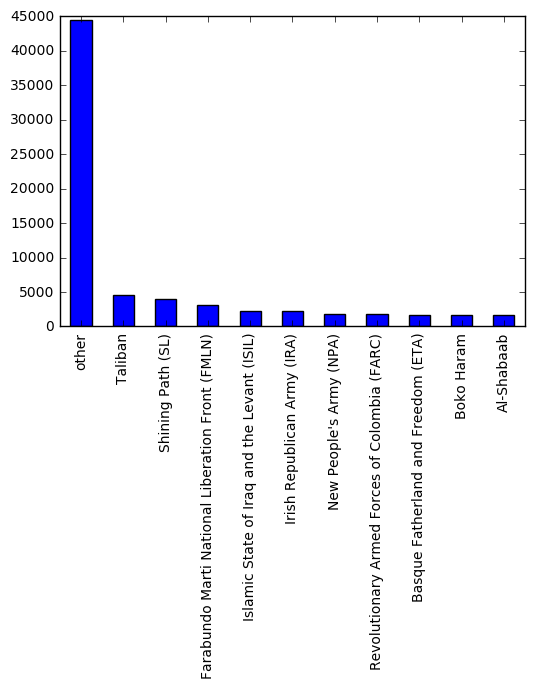

In [67]:

# feature engineering
# terrorist group analysis
#print clean_data.groupby("gname").apply(lambda x: pd.Series({"count":len(x)})).sort_values("count", ascending=False).head(10)

# print np.unique(data["nkillus"])
# visualize_distribution(clean_data, "gname", top_k=10, categorical=True)




In [64]:
# Eval Block
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def quick_test_model(x_train, x_test, y_train, y_test, model, eval_metrics):
    """
    Run a quick test on the model, reports the metrics
    """
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return eval_metrics(y_test,pred)

def compute_learning_curve_multiple(model_dict, x_train, y_train, x_test, 
                                 y_test, metrics, chunks, rep=10):
    """
    Plot out-of-sample learning curve against each models
    @param model_dict " {name -> models}
    """
    # model_performance[model_name][chunk_i]=[]
    model_performance = {}
    for chunk in chunks:
        for i in range(rep):
            # shuffle every iteration
            train_idx = range(len(x_train))
            np.random.shuffle(train_idx)
            train_idx = train_idx[:chunk]
            current_train_x = x_train[train_idx]
            current_train_y = y_train[train_idx]
            for model_name in model_dict:
                if model_name not in model_performance:
                    model_performance[model_name] = {}
                if chunk not in model_performance[model_name]:
                    model_performance[model_name][chunk]=[]
                model_performance[model_name][chunk].append(quick_test_model(current_train_x, x_test, 
                                                                      current_train_y, y_test, 
                                                                      model_dict[model_name], metrics))
    return model_performance
                

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# models
lr = LogisticRegression()
dtree = DecisionTreeClassifier(min_samples_split=40)
rf = RandomForestClassifier(min_samples_split=10)


# Run Model
#dtree.fit(x_train, y_train)
#print(quick_test_model(x_train, x_test, y_train, y_test, rf, accuracy_score))
#print(quick_test_model(x_train, x_test, y_train, y_test, lr, accuracy_score))
#print(quick_test_model(x_train, x_test, y_train, y_test, dtree, accuracy_score))


# learning curve
#curve_plot = plot_learning_curve(model, "Leanring Curve - LR", x_train, y_train)
#curve_plot.show()

# compare model
#x_val = [1000,2000,3000]
#model_dict = {"LR":lr, "dt":dtree}
#res = compute_learning_curve_multiple(model_dict, x_train, y_train, x_test, y_test, accuracy_score, x_val)
#plot_learning_curve_multiple(res, x_val)


0.44088349935
